<b> Homework02-Polynomaial regression from scratch
>Kevin Yang 50541650

In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
np.random.seed(2019)

In [3]:
def polynomial_function(x, order=2, coeffs=None):
    if coeffs is None:
        raise RuntimeError("Must provide coeffs list with length as order +1.")
    coeffs = np.array(list(reversed(coeffs)), dtype=float)
    res = 0
    for e in range(order+1):
        res = res + coeffs[e] * pow(x, e)
    return res

In [4]:
def gaussian_noise(mu=0, sigma=1):
    return np.random.normal(mu, sigma)

In [5]:
def add_noise(values, **args):
    return np.apply_along_axis(lambda x: x + gaussian_noise(**args), 0, values)

In [6]:
f2 = lambda x: polynomial_function(x, 3, [-0.001, 0.21, -0.02, 12])

In [7]:
X = np.array([i for i in range(1, 201)])

In [8]:
np.random.shuffle(X)

In [9]:
y_clean = np.array([f2(x) for x in X], dtype = float)

In [10]:
noise2 = np.random.normal(scale=25, size=(len(y_clean),))

In [11]:
y = y_clean + noise2

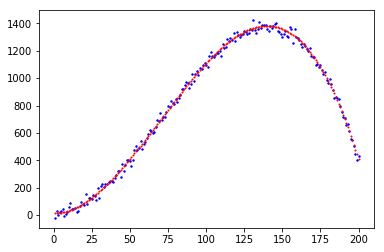

In [12]:
plt.scatter(X, y, color ="blue", s=2)
plt.scatter(X, y_clean, s=1, color="red")
plt.show()

In [15]:
D = np.ones((len(X),4),dtype=float)
for i in range(X.size):
    for e in range(4):
        D[i,e] = pow(X[i],e)

4


In [ ]:
Y = D.T.dot(y.T)
A = D.T.dot(D)
Ainv = inv(A)
W = Ainv.dot(Y)
print(W[0])
print(W[1])
print(W[2])
print(W[3])

In [ ]:
y_pred = np.zeros(X.shape)
for i in range(len(X)):
    y_pred[i] = W[3]*pow(X[i],3) + W[2]*pow(X[i],2) + W[1]*pow(X[i],1) + W[0]

In [ ]:
tem_result = 0
i = 0
for i in range(X.size):
    tem_result = tem_result + ((y[i] - y_pred[i]) * (y[i] - y_pred[i]))
MSE = tem_result / 200
print(MSE)

In [ ]:
tem_result1 = 0
i = 0
for i in range(X.size):
    tem_result1 = tem_result1 + ((y[i] - y_pred[i]) / y[i])
MPE = tem_result1 * 100/200
print(MPE)

In [ ]:
SSres = tem_result
avg_y = 0
i = 0
for i in range(X.size):
    avg_y = avg_y + y[i]
    
    
avg_y = avg_y / X.size
tem = 0
i = 0
for i in range(X.size):
    tem = tem + ((y[i]-avg_y) * (y[i]-avg_y))
SStot = tem
R2 = 1- (SSres/SStot)
print(R2)